In [65]:
cd ~/Desktop/ML-Linear_regression/sgemm_product_dataset ## working directory 

/Users/Sujatha/Desktop/ML-Linear_regression/sgemm_product_dataset


In [66]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

data = pd.read_csv('sgemm_product.csv') # loading the dataset from directory
data = pd.DataFrame(data)
data.shape, data.dtypes, data.info() #dataset shape, datatypes and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


((241600, 18), MWG            int64
 NWG            int64
 KWG            int64
 MDIMC          int64
 NDIMC          int64
 MDIMA          int64
 NDIMB          int64
 KWI            int64
 VWM            int64
 VWN            int64
 STRM           int64
 STRN           int64
 SA             int64
 SB             int64
 Run1 (ms)    float64
 Run2 (ms)    float64
 Run3 (ms)    float64
 Run4 (ms)    float64
 dtype: object, None)

In [67]:
data.columns = [c.replace(' ', '_') for c in data.columns] # space in col names are replaced by '_'

col = data.loc[ : ,"Run1_(ms)":"Run4_(ms)"]

data['avg_run'] = col.mean(axis = 1) # calculating avg run from the 4 runs

data = data.drop(["Run1_(ms)","Run2_(ms)", "Run3_(ms)", "Run4_(ms)"], axis=1)
data.dtypes # dropped the run time variables as we have the avg_run

MWG          int64
NWG          int64
KWG          int64
MDIMC        int64
NDIMC        int64
MDIMA        int64
NDIMB        int64
KWI          int64
VWM          int64
VWN          int64
STRM         int64
STRN         int64
SA           int64
SB           int64
avg_run    float64
dtype: object

### Descriptive statistics to determine the classification of the last column avg_run

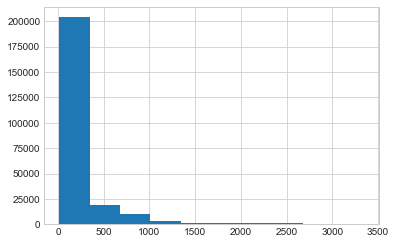

In [68]:
data['avg_run'].hist() ## data is skewed with large number of observations in less than 500 ms runtime

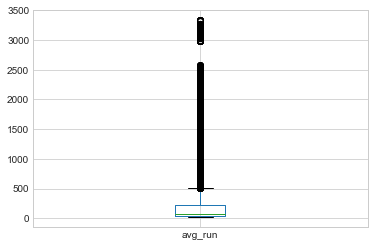

In [69]:
data['avg_run'].plot.box()

In [70]:
data['avg_run'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: avg_run, dtype: float64

In [71]:
data['avg_run'].value_counts(bins = 30)           

(9.988000000000001, 124.257]    146069
(124.257, 235.197]               36617
(235.197, 346.136]               21268
(457.076, 568.016]               12356
(789.895, 900.835]                4260
(568.016, 678.955]                3887
(678.955, 789.895]                3269
(900.835, 1011.774]               2820
(346.136, 457.076]                2612
(1122.714, 1233.654]              1869
(2343.05, 2453.99]                1306
(1011.774, 1122.714]              1082
(1566.473, 1677.412]               633
(1455.533, 1566.473]               455
(1677.412, 1788.352]               436
(2121.171, 2232.111]               417
(2232.111, 2343.05]                305
(2010.231, 2121.171]               280
(1899.292, 2010.231]               272
(1233.654, 1344.594]               269
(1788.352, 1899.292]               243
(3119.628, 3230.568]               241
(1344.594, 1455.533]               207
(2453.99, 2564.93]                 180
(3008.688, 3119.628]               177
(3230.568, 3341.507]     

### Not removing any observations as outliers we will split the data across the median i.e values lower than or equal to 69.79 ~ 70 ms are high speed run time and above that are low speed run time

In [72]:
high_speed_data = data[data['avg_run'] <= 70]
low_speed_data = data[data['avg_run'] > 70]

In [73]:
high_speed_data['avg_run'].describe()

count    121129.000000
mean         42.698753
std          12.755422
min          13.317500
25%          33.377500
50%          40.710000
75%          51.305000
max          70.000000
Name: avg_run, dtype: float64

In [74]:
low_speed_data['avg_run'].describe()

count    120471.000000
mean        393.400293
std         459.205636
min          70.002500
25%         132.863750
50%         229.107500
75%         494.503750
max        3341.507500
Name: avg_run, dtype: float64

In [75]:
data['Class'] =data['avg_run'].apply(lambda x: 1 if x <= 70 else 0)

In [76]:
log_data = data.drop(["avg_run"], axis = 1)

In [77]:
log_data["Class"].value_counts() ## balanced data

1    121129
0    120471
Name: Class, dtype: int64

In [78]:
## Split our data into 70% train and 30%test
log_data = log_data.sample(frac=1) ## random distribution of data

log_train_index = int(0.7 * log_data.shape[0])

log_train = log_data.head(log_train_index)
log_test = log_data.tail(log_data.shape[0] - log_train_index)

log_train.shape,log_test.shape

((169120, 15), (72480, 15))

In [79]:
X = log_train.iloc[:, :14] # X variables from the dataset

x = np.full([169120,1],1) # X(0) variables added for beta(0) variables as 1
X = np.hstack((x,X)) # full set of X variables

Y = log_train["Class"] # Y avriables

B = np.zeros(X.shape[1]) # beta variables

X.shape, Y.shape, B.shape #dimensions for the X, Y, beta vectors

((169120, 15), (169120,), (15,))

In [81]:
## Test data
test_X = log_test.iloc[:, :14]
x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((x,test_X)) # full set of X variables

test_Y = log_test["Class"]

test_X.shape, test_Y.shape

((72480, 15), (72480,))

In [86]:
## Defining the cost MSE function

def cost_function(X_var, Y_actual, B_var):
    m = len(Y_actual)
    Y_pred = 1/(1+np.exp(-(np.dot(X_var, B_var))))

    cost = [0] * Y_actual.shape[0]
    for j in range(Y_actual.shape[0]):
        if Y_actual.iloc[j] == 1:
            cost[j] = np.log(Y_pred[j])
        else:
            cost[j] = np.log(1-(Y_pred[j]))
    tcost = np.sum(cost)/(-m)
    return tcost

train_cost = cost_function(X, Y, B)
test_cost = cost_function(test_X, test_Y, B)
train_cost, test_cost

(0.6931471805599453, 0.6931471805599453)

In [51]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    for iteration in range(0, iterations):
        Y_pred = 1/(1+np.exp(-(np.dot(X_var, B_var))))
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        #if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.0001:
            #print("Break ",cost_history[iteration]," ", cost_history[iteration-1], iteration)
            #break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
            
    return B_var, cost_history

### 1st experiment
### Experiment with various parameters for linear and logistic regression (e.g. learning rate ∝) and report on your findings as how the error/accuracy varies for train and test sets with varying these parameters. Plot the results. Report the best values of the parameters.

In [37]:
# alpha = 0.0001 & iterations = 2000

alpha_11 = 0.0001
iterations_11 = 2000

new_B_11,cost_11 = gradient_descent(X, Y, B, alpha_11, iterations_11)

new_B_11, cost_11

(array([ 0.00297116, -0.02577084, -0.01518552,  0.01491385,  0.08522812,
         0.07022597,  0.0168314 ,  0.01704702,  0.0136373 ,  0.00605709,
         0.00961857,  0.00657786,  0.00195696,  0.00781329,  0.00273801]),
 array([0.69314718, 0.68477026, 0.68056384, ..., 0.50617092, 0.50616537,
        0.50615982]))

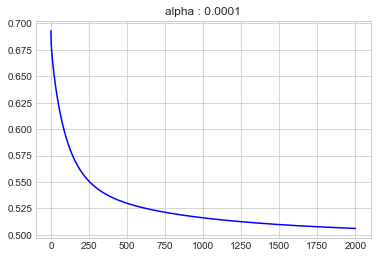

In [102]:
itera_11 = np.arange(iterations_11)
#itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_11, cost_11, color='blue')
plt.title("alpha : 0.0001");

In [84]:
## Fit to test data

B_11 = new_B_11

test_Y_pred_11 = 1/(1+np.exp(-(np.dot(test_X, B_11))))
                    
train_error_11 = cost_function(X, Y, B_11)
test_error_11 = cost_function(test_X, test_Y, B_11)

train_error_11 , test_error_11

(0.5075942172596597, 0.5058654165207969)

In [ ]:
# alpha = 0.001 & iterations = 2000

alpha_12 = 0.001
iterations_12 = 2000

new_B_12,cost_12 = gradient_descent(X, Y, B, alpha_12, iterations_12)

new_B_12, cost_12

In [ ]:
itera_12 = np.arange(iterations_12)
plt.style.use('seaborn-whitegrid')
plt.plot(itera_12, cost_12, color='blue')
plt.title("log_alpha = 0.001");

In [ ]:
## Fit to test data

B_12 = new_B_12

test_Y_pred_12 = 1/(1+np.exp(-(np.dot(test_X, B_12))))
                    
train_error_12 = cost_function(X, Y, B_12)
test_error_12 = cost_function(test_X, test_Y, B_12)

train_error_12 , test_error_12

In [ ]:
# alpha = 0.00001 & iterations = 2000

alpha_13 = 0.00001
iterations_13 = 2000

new_B_13,cost_13 = gradient_descent(X, Y, B, alpha_13, iterations_13)

new_B_13, cost_13

In [ ]:
itera_13 = np.arange(iterations_13)
#itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_13, cost_13, color='blue')
plt.title("alpha = 0.00001");

In [ ]:
## Fit to test data

B_13 = new_B_13

test_Y_pred_13 = 1/(1+np.exp(-(np.dot(test_X, B_13))))
                    
train_error_13 = cost_function(X, Y, B_13)
test_error_13 = cost_function(test_X, test_Y, B_13)
train_error_13 , test_error_13

In [ ]:
# alpha = 0.00001 & iterations = 2000

alpha_14 = 0.00005
iterations_14 = 2000

new_B_14,cost_14 = gradient_descent(X, Y, B, alpha_14, iterations_14)

new_B_14, cost_14

In [ ]:
itera_14 = np.arange(iterations_14)
#itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_14, cost_14, color='blue')
plt.title("alpha = 0.00005");

In [ ]:
## Fit to test data

B_14 = new_B_14

test_Y_pred_14 = 1/(1+np.exp(-(np.dot(test_X, B_14))))
                    
train_error_14 = cost_function(X, Y, B_14)
test_error_14 = cost_function(test_X, test_Y, B_14)
train_error_14 , test_error_14

### Experiment 2: Experiment with various thresholds for convergence for linear and logistic regression. Plot error results for train and test sets as a function of threshold and describe how varying the threshold affects error. Pick your best threshold and plot train and test error (in one figure) as a function of number of gradient descent iterations.

Break  0.6849632542269878   0.6931471805599453 1
[ 1.86258278e-07 -8.57398297e-04 -4.81631977e-04  1.41721854e-05
  7.52719962e-05  6.16272469e-05  1.01277200e-05  1.94489120e-05
  1.63552507e-06 -1.67783231e-05 -7.92366367e-06  2.65905866e-06
  3.68673132e-07  3.23172895e-06  7.47693945e-07] [0.69314718 0.68496325 0.         ... 0.         0.         0.        ]


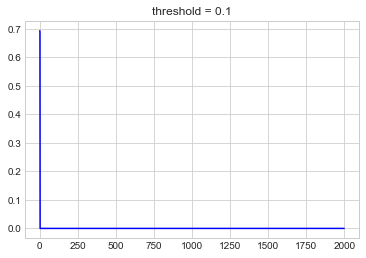

In [90]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    for iteration in range(0, iterations):
        Y_pred = 1/(1+np.exp(-(np.dot(X_var, B_var))))
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.1:
            print("Break ",cost_history[iteration]," ", cost_history[iteration-1], iteration)
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
            
    return B_var, cost_history


# alpha = 0.00001 & iterations = 2000
alpha_21 = 0.0001
iterations_21 = 2000

new_B_21,cost_21 = gradient_descent(X, Y, B, alpha_21, iterations_21)
print(new_B_21, cost_21)

### Cost Graph
itera_21 = np.arange(iterations_21)
#itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_21, cost_21, color='blue')
plt.title("threshold = 0.1");

In [91]:
## Fit to test data

B_21 = new_B_21

test_Y_pred_21 = 1/(1+np.exp(-(np.dot(test_X, B_21))))
                    
train_error_21 = cost_function(X, Y, B_21)
test_error_21 = cost_function(test_X, test_Y, B_21)
train_error_21 , test_error_21

(0.6849632542269878, 0.6847354923901283)

Break  0.6849632542269878   0.6931471805599453 1
[ 1.86258278e-07 -8.57398297e-04 -4.81631977e-04  1.41721854e-05
  7.52719962e-05  6.16272469e-05  1.01277200e-05  1.94489120e-05
  1.63552507e-06 -1.67783231e-05 -7.92366367e-06  2.65905866e-06
  3.68673132e-07  3.23172895e-06  7.47693945e-07] [0.69314718 0.68496325 0.         ... 0.         0.         0.        ]


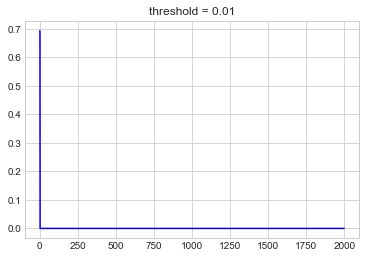

In [92]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    for iteration in range(0, iterations):
        Y_pred = 1/(1+np.exp(-(np.dot(X_var, B_var))))
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.01:
            print("Break ",cost_history[iteration]," ", cost_history[iteration-1], iteration)
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
            
    return B_var, cost_history


# alpha = 0.0001 & iterations = 2000
alpha_22 = 0.0001
iterations_22 = 2000

new_B_22,cost_22 = gradient_descent(X, Y, B, alpha_22, iterations_22)
print(new_B_22, cost_22)

### Cost Graph
itera_22 = np.arange(iterations_22)
#itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_22, cost_22, color='blue')
plt.title("threshold = 0.01");

In [93]:
## Fit to test data

B_22 = new_B_22

test_Y_pred_22 = 1/(1+np.exp(-(np.dot(test_X, B_22))))
                    
train_error_22 = cost_function(X, Y, B_22)
test_error_22 = cost_function(test_X, test_Y, B_22)
train_error_22 , test_error_22

(0.6849632542269878, 0.6847354923901283)

Break  0.5433566778616257   0.5434561875111943 320
[ 0.00117229 -0.01866778 -0.00944203  0.02453116  0.03341667  0.028191
  0.01858214  0.01829567  0.00586276  0.00086821  0.00179912  0.00140283
  0.00067333  0.00159289  0.00079447] [0.69314718 0.68496325 0.68084169 ... 0.         0.         0.        ]


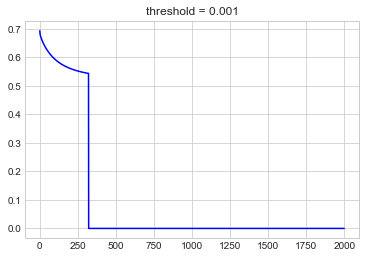

In [98]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    for iteration in range(0, iterations):
        Y_pred = 1/(1+np.exp(-(np.dot(X_var, B_var))))
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.0001:
            print("Break ",cost_history[iteration]," ", cost_history[iteration-1], iteration)
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
            
    return B_var, cost_history


# alpha = 0.0001 & iterations = 2000
alpha_23 = 0.0001
iterations_23 = 2000

new_B_23,cost_23 = gradient_descent(X, Y, B, alpha_23, iterations_23)
print(new_B_23, cost_23)

### Cost Graph
itera_23 = np.arange(iterations_23)
#itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_23, cost_23, color='blue')
plt.title("threshold = 0.001");

In [99]:
## Fit to test data

B_23 = new_B_23

test_Y_pred_23 = 1/(1+np.exp(-(np.dot(test_X, B_23))))
                    
train_error_23 = cost_function(X, Y, B_23)
test_error_23 = cost_function(test_X, test_Y, B_23)
train_error_23 , test_error_23

(0.5433566778616257, 0.5422459502584304)

In [100]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    for iteration in range(0, iterations):
        Y_pred = 1/(1+np.exp(-(np.dot(X_var, B_var))))
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.000001:
            print("Break ",cost_history[iteration]," ", cost_history[iteration-1], iteration)
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
            
    return B_var, cost_history


# alpha = 0.0001 & iterations = 2000
alpha_24 = 0.0001
iterations_24 = 2000

new_B_24,cost_24 = gradient_descent(X, Y, B, alpha_24, iterations_24)
print(new_B_24, cost_24)

### Cost Graph
itera_24 = np.arange(iterations_24)
#itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_24, cost_24, color='blue')
plt.title("threshold = 0.000001");

KeyboardInterrupt: 

In [ ]:
## Fit to test data

B_24 = new_B_24

test_Y_pred_24 = 1/(1+np.exp(-(np.dot(test_X, B_24))))
                    
train_error_24 = cost_function(X, Y, B_24)
test_error_24 = cost_function(test_X, test_Y, B_24)
train_error_24, test_error_24

### Experiment 3

#### To select 8 random columns I have used randint() from numpy that selects random integer value within the specified range, based on those numbers the columns would be selected.

In [ ]:
import random
random.seed(123)
random.sample(range(1,14),8)

So now as per the number generated, the columns are
1 = MWG  
5 = NDIMC  
2 = NWG  
7 = NDIMB  
12 = STRN  
11 = STRM  
10 = VWN  
13 = SA  

In [ ]:
X_experiment3 = train[["MWG","NDIMC", "NWG", "NDIMB", "STRN", "STRM", "VWN","SA"]]
x = np.full([169120,1],1) # X(0) variables added for beta(0) variables as 1
X_experiment3 = np.hstack((x,X_experiment3)) # full set of X variables

Y = Y = train["avg_run"] # Y avriables

B = np.zeros(X_experiment3.shape[1]) # Initial values of beta variables

X_experiment3.shape, Y.shape#, B.shape #dimensions for the X, Y, beta vectors

In [ ]:
test_X_experiment3 = test[["MWG","NDIMC", "NWG", "NDIMB", "STRN", "STRM", "VWN","SA"]]
x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X_experiment3 = np.hstack((x,test_X_experiment3)) # full set of X variables

test_Y = test["avg_run"] # Y avriables


test_X_experiment3.shape, test_Y.shape#, B.shape #dimensions for the X, Y, beta vectors

In [ ]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    for iteration in range(0, iterations):
        Y_pred = 1/(1+np.exp(-(np.dot(X_var, B_var))))
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.000001:
            print("Break ",cost_history[iteration]," ", cost_history[iteration-1], iteration)
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
            
    return B_var, cost_history


# alpha = 0.0001 & iterations = 2000
alpha_3 = 0.0001
iterations_3 = 2000

new_B_3,cost_3 = gradient_descent(X_experiment3, Y, B, alpha_3, iterations_3)
print(new_B_3, cost_3)

In [ ]:
train_error_experiment3 = cost_function(X_experiment3, Y, new_B_3)
test_error_experiment3 = cost_function(test_X_experiment3, test_Y, new_B_3)

train_error = cost_function(X, Y, new_B_24)
test_error = cost_function(test_X, Y_test, new_B_24)
                           
print("train_error_experiment3: ", train_error_experiment3) 
print("test_error_experiment3: ", test_error_experiment3)
print("train_error: ", train_error)
print("test_error: ", test_error)

### Experiment 4: Now pick eight features that you think are best suited to predict the output, and retrain your models using these ten features. Compare to the case of using your original set of features and to the random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?

In [ ]:
#### I choose my 8 variables from the correlation matrix. Overall the numbers are quite low, but they do have some effect. As per the results the varaibles are
1)	MWG  
2)	NWG  
3)	VWM  
4)	VWN  
5)	MDIMC  
6)	NDIMC  
7)	SA  
8)	SB  

In [ ]:
X_experiment4 = train[["MWG","NDIMC", "NWG", "MDIMC", "SB", "VWM", "VWN","SA"]]
x = np.full([169120,1],1) # X(0) variables added for beta(0) variables as 1
X_experiment4 = np.hstack((x,X_experiment4)) # full set of X variables

Y = Y = train["avg_run"] # Y avriables

B = np.zeros(X_experiment4.shape[1]) # Initial values of beta variables

X_experiment4.shape, Y.shape#, B.shape #dimensions for the X, Y, beta vectors

In [ ]:
test_X_experiment4 = test[["MWG","NDIMC", "NWG", "MDIMC", "SB", "VWM", "VWN","SA"]]
x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X_experiment4 = np.hstack((x,test_X_experiment4)) # full set of X variables

test_Y = test["avg_run"] # Y avriables


test_X_experiment4.shape, test_Y.shape#, B.shape #dimensions for the X, Y, beta vectors

In [ ]:
# Retraining the model with optimum alpha, threshold and iterations
def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.000001:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
        
            
    return B_var, cost_history


alpha_4 = 0.0001
iterations_4 = 2000

new_B_4,cost_4 = gradient_descent(X_experiment4, Y, B, alpha_3, iterations_3)

new_B_4, cost_4

In [ ]:
train_error_experiment4 = cost_function(X_experiment4, Y, new_B_4)
test_error_experiment4 = cost_function(test_X_experiment4, test_Y, new_B_4)

train_error = cost_function(X, Y, new_B_24)
test_error = cost_function(test_X, Y_test, new_B_24)
                           
print("train_error_experiment4: ", train_error_experiment4) 
print("test_error_experiment4: ", test_error_experiment4)
print("train_error: ", train_error)
print("test_error: ", test_error) 